In [2]:
!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
df = sns.load_dataset("mpg")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### Ungrouped Frequency

In [4]:
df['origin'].count()

np.int64(398)

In [5]:
df['origin'].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

<Axes: xlabel='origin'>

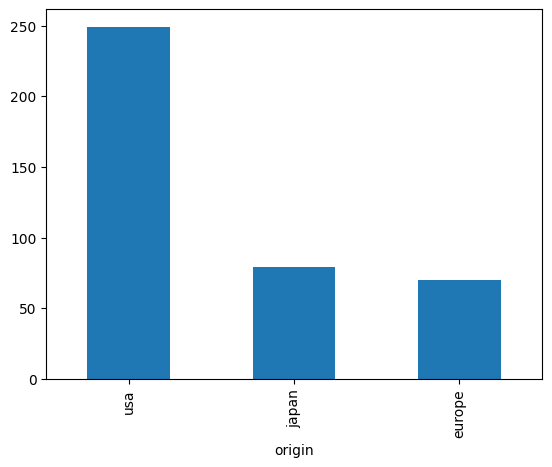

In [6]:
df['origin'].value_counts().plot(kind = "bar")

<Axes: xlabel='origin'>

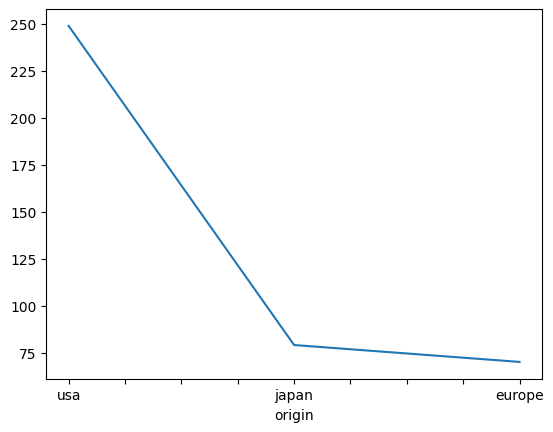

In [7]:
df['origin'].value_counts().plot(kind = "line")

In [8]:
df['model_year'].value_counts()

model_year
73    40
78    36
76    34
82    31
75    30
80    29
79    29
81    29
70    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64

In [9]:
data = {
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female'],
    'Preference': ['A', 'B', 'A', 'B', 'A']
}
df_temp = pd.DataFrame(data)

# Crosstab
ct = pd.crosstab(df_temp['Gender'], df_temp['Preference'])
print(ct)

Preference  A  B
Gender          
Female      2  1
Male        1  1


The output is a matrix or cross-table with rows and cols with preferces and genders as their values.  
Female - 2 - A, Female - 1 - B, ....

In [10]:
pd.crosstab(df['origin'], "Number of cars")

col_0,Number of cars
origin,
europe,70
japan,79
usa,249


In [11]:
pd.crosstab(df['origin'], df['model_year'])

model_year,70,71,72,73,74,75,76,77,78,79,80,81,82
origin,,,,,,,,,,,,,
europe,5,4,5,7,6,6,8,4,6,4,9,4,2
japan,2,4,5,4,6,4,4,6,8,2,13,12,9
usa,22,20,18,29,15,20,22,18,22,23,7,13,20


### Relative Frequency

In [12]:
cars_in_each_country = pd.crosstab(df['origin'], "Number of Cars")

In [13]:
cars_in_each_country["Relative Frequency"] = cars_in_each_country["Number of Cars"]/sum(cars_in_each_country["Number of Cars"])

In [14]:
cars_in_each_country

col_0,Number of Cars,Relative Frequency
origin,,
europe,70,0.175879
japan,79,0.198492
usa,249,0.625628


### Percentage Frequency

In [15]:
cars_in_each_country["Percentage Frequency"] = cars_in_each_country["Relative Frequency"] * 100

In [16]:
cars_in_each_country

col_0,Number of Cars,Relative Frequency,Percentage Frequency
origin,,,
europe,70,0.175879,17.587940
japan,79,0.198492,19.849246
usa,249,0.625628,62.562814


<Axes: ylabel='count'>

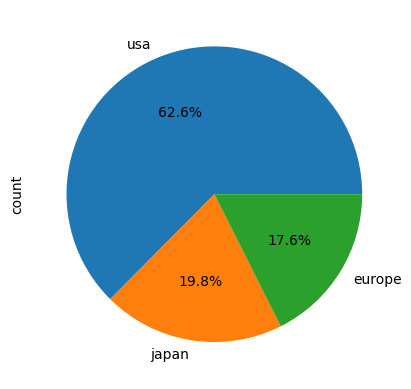

In [17]:
df["origin"].value_counts(). plot(kind = "pie", autopct = "%1.1f%%")

### Grouped Frequency

In [18]:
df["displacement"].value_counts(bins = 5)

(67.612, 145.4]    196
(300.2, 377.6]      73
(222.8, 300.2]      60
(145.4, 222.8]      44
(377.6, 455.0]      25
Name: count, dtype: int64

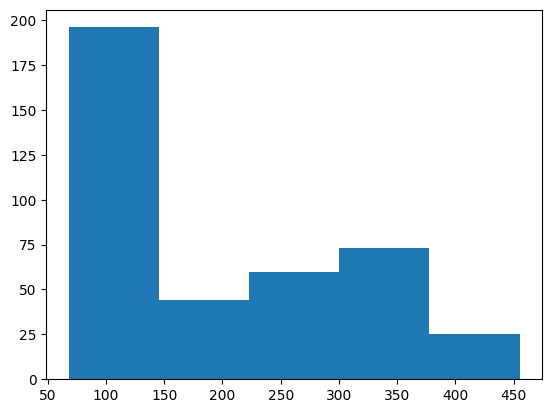

In [19]:
plt.hist(df['displacement'], bins = 5)
plt.show()

In [20]:
df['horsepower'].value_counts(bins = 5, sort=False)


(45.815000000000005, 82.8]    122
(82.8, 119.6]                 164
(119.6, 156.4]                 66
(156.4, 193.2]                 27
(193.2, 230.0]                 13
Name: count, dtype: int64

(array([122., 164.,  66.,  27.,  13.]),
 array([ 46. ,  82.8, 119.6, 156.4, 193.2, 230. ]),
 <BarContainer object of 5 artists>)

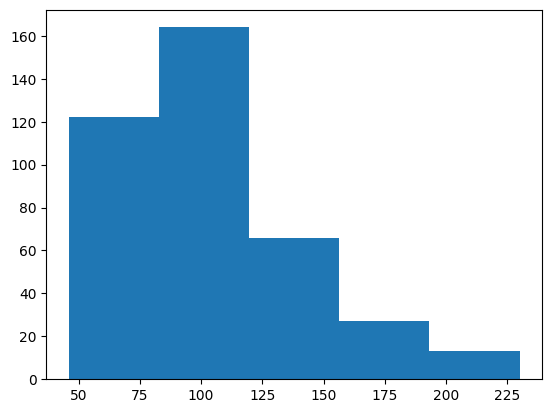

In [21]:
plt.hist(df['horsepower'], bins = 5)

In [28]:
data = (
    df['horsepower']
    .value_counts(bins=5, sort=False)  # Create 5 bins and count occurrences
    .to_frame()
    .reset_index()
    .rename(columns={"index": "horsepower", "horsepower": "Frequency of cars"})
)

In [29]:
print(data.columns)

Index(['horsepower', 'count'], dtype='object')


In [30]:
data

,horsepower,count
0,"(45.815000000000005, 82.8]",122
1,"(82.8, 119.6]",164
2,"(119.6, 156.4]",66
3,"(156.4, 193.2]",27
4,"(193.2, 230.0]",13


In [32]:
data["Relative Frequency"] = data["count"]/sum(data["count"])

In [33]:
data

,horsepower,count,Relative Frequency
0,"(45.815000000000005, 82.8]",122,0.311224
1,"(82.8, 119.6]",164,0.418367
2,"(119.6, 156.4]",66,0.168367
3,"(156.4, 193.2]",27,0.068878
4,"(193.2, 230.0]",13,0.033163


In [34]:
data["Percentage Frequency"] = data["Relative Frequency"]* 100

In [35]:
data

,horsepower,count,Relative Frequency,Percentage Frequency
0,"(45.815000000000005, 82.8]",122,0.311224,31.122449
1,"(82.8, 119.6]",164,0.418367,41.836735
2,"(119.6, 156.4]",66,0.168367,16.836735
3,"(156.4, 193.2]",27,0.068878,6.887755
4,"(193.2, 230.0]",13,0.033163,3.316327


autopct ---> displays percentage values inside pie chart

<Axes: ylabel='count'>

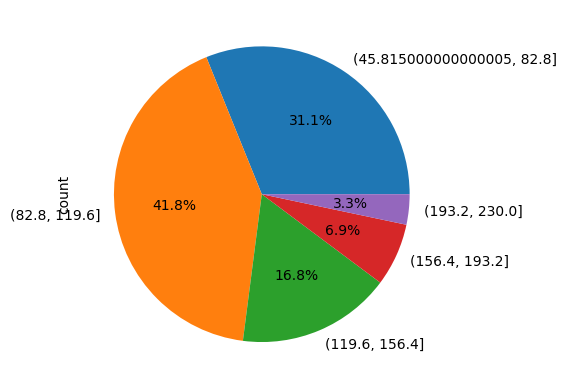

In [37]:
df["horsepower"].value_counts(bins=5, sort=False).plot(kind ="pie", autopct = "%1.1f%%")

In [38]:
df["weight"].value_counts(bins=10, sort = False)

(1609.472, 1965.7]    31
(1965.7, 2318.4]      90
(2318.4, 2671.1]      59
(2671.1, 3023.8]      54
(3023.8, 3376.5]      37
(3376.5, 3729.2]      40
(3729.2, 4081.9]      29
(4081.9, 4434.6]      34
(4434.6, 4787.3]      18
(4787.3, 5140.0]       6
Name: count, dtype: int64

In [39]:
df["weight"].value_counts(bins=10, sort = True)

(1965.7, 2318.4]      90
(2318.4, 2671.1]      59
(2671.1, 3023.8]      54
(3376.5, 3729.2]      40
(3023.8, 3376.5]      37
(4081.9, 4434.6]      34
(1609.472, 1965.7]    31
(3729.2, 4081.9]      29
(4434.6, 4787.3]      18
(4787.3, 5140.0]       6
Name: count, dtype: int64

In [41]:
df[(df["weight"] > 4787.3) & (df["weight"] < 5140.1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
42,12.0,8,383.0,180.0,4955,11.5,71,usa,dodge monaco (sw)
44,13.0,8,400.0,175.0,5140,12.0,71,usa,pontiac safari (sw)
90,12.0,8,429.0,198.0,4952,11.5,73,usa,mercury marquis brougham
95,12.0,8,455.0,225.0,4951,11.0,73,usa,buick electra 225 custom
103,11.0,8,400.0,150.0,4997,14.0,73,usa,chevrolet impala
104,12.0,8,400.0,167.0,4906,12.5,73,usa,ford country


df.sort_values() ---> sort a dataFrame by one or more columns

In [43]:
df.sort_values(by="weight" ,  ascending=False)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
44,13.0,8,400.0,175.0,5140,12.0,71,usa,pontiac safari (sw)
103,11.0,8,400.0,150.0,4997,14.0,73,usa,chevrolet impala
42,12.0,8,383.0,180.0,4955,11.5,71,usa,dodge monaco (sw)
90,12.0,8,429.0,198.0,4952,11.5,73,usa,mercury marquis brougham
95,12.0,8,455.0,225.0,4951,11.0,73,usa,buick electra 225 custom
...,...,...,...,...,...,...,...,...,...
53,31.0,4,71.0,65.0,1773,19.0,71,japan,toyota corolla 1200
345,35.1,4,81.0,60.0,1760,16.1,81,japan,honda civic 1300
343,39.1,4,79.0,58.0,1755,16.9,81,japan,toyota starlet
144,31.0,4,76.0,52.0,1649,16.5,74,japan,toyota corona


<Axes: >

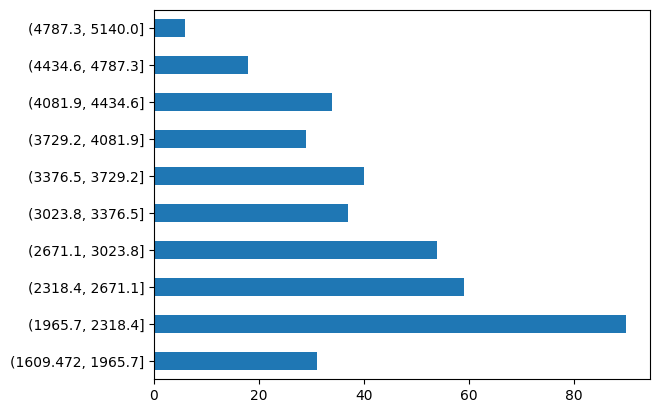

In [44]:
df["weight"].value_counts(bins=10, sort=False).plot(kind="barh")